In [1]:
#import pandas
import pandas as pd

# load in data
df = pd.read_csv('user_ex_python.csv')
df

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5
2,2017-01-03,python,10


In [2]:
# check out index
df.index

RangeIndex(start=0, stop=3, step=1)

In [3]:
# slice and dice data
df.loc[:1]

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5


In [4]:
# set new index
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df

,date,language,ex_complete
date,,,
2017-01-01,2017-01-01,python,6
2017-01-02,2017-01-02,python,5
2017-01-03,2017-01-03,python,10


In [5]:
# check out new index
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', name='date', freq=None)

In [6]:
# Slice and dice data w/ new index
df.loc['2017-01-02']

date           2017-01-02
language           python
ex_complete             5
Name: 2017-01-02 00:00:00, dtype: object

In [7]:
# import and check out data
df = pd.read_csv('user_ex.csv')
df

,date,language,ex_complete
0,2017-01-01,python,6
1,2017-01-02,python,5
2,2017-01-03,python,10
3,2017-01-01,r,8
4,2017-01-02,r,8
5,2017-01-03,r,8


In [8]:
# set index
df.set_index(['date', 'language'], inplace=True)
df

,,ex_complete
date,language,
2017-01-01,python,6
2017-01-02,python,5
2017-01-03,python,10
2017-01-01,r,8
2017-01-02,r,8
2017-01-03,r,8


In [9]:
df.index

MultiIndex(levels=[['2017-01-01', '2017-01-02', '2017-01-03'], ['python', 'r']],
           codes=[[0, 1, 2, 0, 1, 2], [0, 0, 0, 1, 1, 1]],
           names=['date', 'language'])

In [10]:
# Sort index
df.sort_index(inplace=True)
df

ex_complete
date       language             
2017-01-01 python              6
           r                   8
2017-01-02 python              5
           r                   8
2017-01-03 python             10
           r                   8

In [11]:
# slice and dice your data
df.loc[('2017-01-02', 'r')]

ex_complete    8
Name: (2017-01-02, r), dtype: int64

In [13]:
# import and check out the data
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# check out index
tips.index

RangeIndex(start=0, stop=244, step=1)

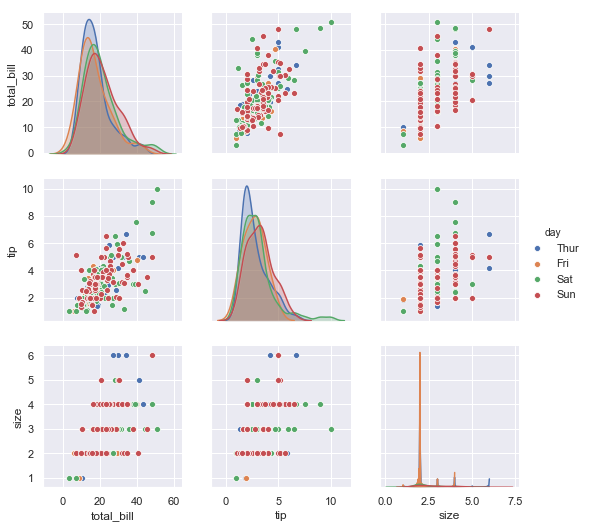

In [15]:
# Import pyplot, figures inline, set style, plot pairplot
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.pairplot(tips, hue='day')

In [16]:
# get the mean of smoker/non-smoker groups
df=tips.groupby('smoker').mean()
df

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


In [17]:
#check out the new index
df.index

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, name='smoker', dtype='category')

In [19]:
# reset the index
df.reset_index()

,smoker,total_bill,tip,size
0,Yes,20.756344,3.008710,2.408602
1,No,19.188278,2.991854,2.668874


In [21]:
# group by two columns
df = tips.groupby(['smoker', 'time']).mean()
df

total_bill       tip      size
smoker time                                  
Yes    Lunch    17.399130  2.834348  2.217391
       Dinner   21.859429  3.066000  2.471429
No     Lunch    17.050889  2.673778  2.511111
       Dinner   20.095660  3.126887  2.735849

In [22]:
# check out index
df.index

MultiIndex(levels=[['Yes', 'No'], ['Lunch', 'Dinner']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['smoker', 'time'])

In [23]:
# group by two features
tips.groupby(['smoker', 'time']).size()

smoker  time  
Yes     Lunch      23
        Dinner     70
No      Lunch      45
        Dinner    106
dtype: int64

In [24]:
# swap levels of multi-index
df.swaplevel()

,,total_bill,tip,size
time,smoker,,,
Lunch,Yes,17.399130,2.834348,2.217391
Dinner,Yes,21.859429,3.066000,2.471429
Lunch,No,17.050889,2.673778,2.511111
Dinner,No,20.095660,3.126887,2.735849


In [25]:
df.unstack()

total_bill                  tip                size          
time        Lunch     Dinner     Lunch    Dinner     Lunch    Dinner
smoker                                                              
Yes     17.399130  21.859429  2.834348  3.066000  2.217391  2.471429
No      17.050889  20.095660  2.673778  3.126887  2.511111  2.735849

In [26]:
# unstack the outter index
df.unstack(level=0)

total_bill                  tip                size          
smoker        Yes         No       Yes        No       Yes        No
time                                                                
Lunch   17.399130  17.050889  2.834348  2.673778  2.217391  2.511111
Dinner  21.859429  20.095660  3.066000  3.126887  2.471429  2.735849

In [27]:
# check out index
df.unstack().index

CategoricalIndex(['Yes', 'No'], categories=['Yes', 'No'], ordered=False, name='smoker', dtype='category')